In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_datareader as data
from pandas_datareader import data as pdr
import yfinance as yfin

In [6]:
yfin.pdr_override()

start = '2010-01-01'
end = '2021-12-31'

df = pdr.get_data_yahoo('GOOG', start, end)

# df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,28443.328125,28542.228516,27552.500000,27851.640625,27851.640625,1282359120
2014-09-18,27822.773438,27822.773438,25085.740234,25774.119141,25774.119141,2093992320
2014-09-19,25753.654297,25988.835938,23366.087891,24023.335938,24023.335938,2307413745
2014-09-20,24015.851562,25757.560547,23724.380859,24881.808594,24881.808594,2243150060
2014-09-21,24831.972656,25096.121094,23925.064453,24268.257812,24268.257812,1617399085


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.712143
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.083878


In [7]:
df = df.reset_index()

In [8]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


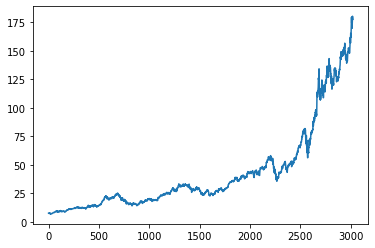

In [11]:
plt.plot(df.Close)

In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

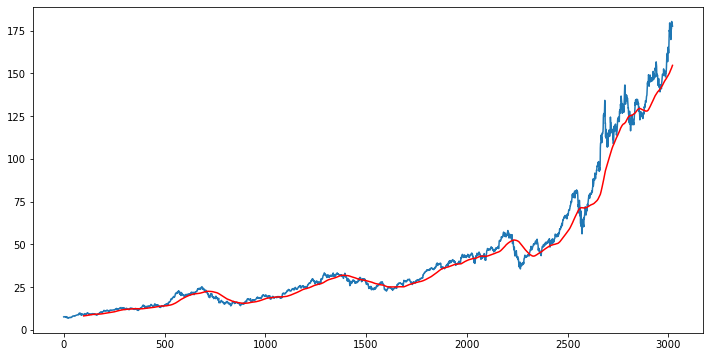

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

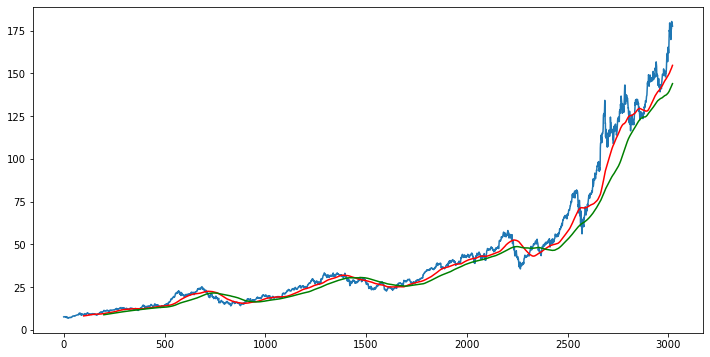

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(3022, 5)

In [20]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [22]:
# Scalying the data 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [25]:
data_training_array.shape

(2115, 1)

In [26]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):    # Time Series Analysis
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [28]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [31]:
# ML model
x_train.shape


(2015, 100, 1)

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [35]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 12s 138ms/step - loss: 0.0361
Epoch 2/50
63/63 [==============================] - 8s 133ms/step - loss: 0.0094
Epoch 3/50
63/63 [==============================] - 9s 136ms/step - loss: 0.0076
Epoch 4/50
63/63 [==============================] - 8s 132ms/step - loss: 0.0071
Epoch 5/50
63/63 [==============================] - 8s 131ms/step - loss: 0.0067
Epoch 6/50
63/63 [==============================] - 8s 130ms/step - loss: 0.0061
Epoch 7/50
63/63 [==============================] - 8s 132ms/step - loss: 0.0062
Epoch 8/50
63/63 [==============================] - 9s 135ms/step - loss: 0.0049
Epoch 9/50
63/63 [==============================] - 9s 139ms/step - loss: 0.0060
Epoch 10/50
63/63 [==============================] - 9s 136ms/step - loss: 0.0048
Epoch 11/50
63/63 [==============================] - 9s 142ms/step - loss: 0.0046
Epoch 12/50
63/63 [==============================] - 8s 133ms/step - loss: 0.0057
Epoch 13/50
63/63 [=====

In [36]:
model.save('keras_model.h5')

In [37]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [38]:
data_training.tail(100)

,Close
2015,43.057499
2016,43.257500
2017,43.750000
2018,43.587502
2019,43.582500
...,...
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498


In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [41]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [43]:
#Minmax scaler for testing data set

input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [44]:
input_data.shape

(1007, 1)

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [47]:
# Making Predictions

y_predicted = model.predict(x_test)

In [48]:
y_predicted.shape

(907, 1)

In [49]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [50]:
y_predicted

array([[0.15202454],
       [0.15307564],
       [0.15396276],
       [0.15468568],
       [0.15525925],
       [0.15571034],
       [0.15607308],
       [0.15638304],
       [0.15666908],
       [0.15694092],
       [0.1572043 ],
       [0.15746307],
       [0.15771425],
       [0.15795201],
       [0.15816505],
       [0.15834111],
       [0.1584625 ],
       [0.15851517],
       [0.15848847],
       [0.15837559],
       [0.1581608 ],
       [0.1578409 ],
       [0.15742622],
       [0.15693623],
       [0.15639332],
       [0.15582669],
       [0.15525512],
       [0.15469605],
       [0.15417276],
       [0.15371539],
       [0.1533499 ],
       [0.15308589],
       [0.15293255],
       [0.15289588],
       [0.15297373],
       [0.15315937],
       [0.15343791],
       [0.15379502],
       [0.1542143 ],
       [0.15467876],
       [0.1551761 ],
       [0.15569897],
       [0.15623334],
       [0.1567666 ],
       [0.15727916],
       [0.15775262],
       [0.15820542],
       [0.158

In [51]:
scaler.scale_

array([0.00690691])

In [52]:
scale_factor = 1/0.00690691
y_predicted = y_predicted *scale_factor
y_test = y_test * scale_factor

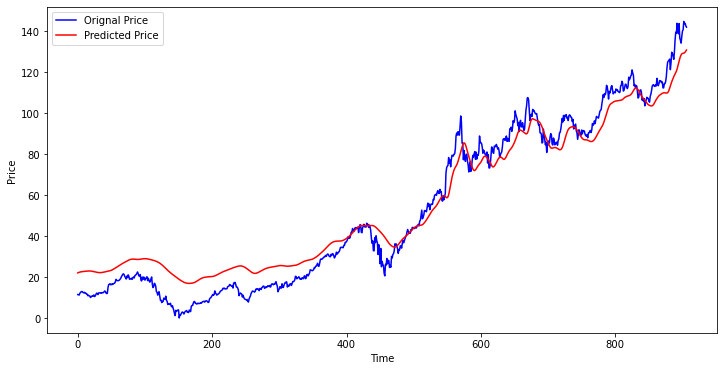

In [53]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()